In [1]:
#Machine Learning
 #The ability of machine to learn without being explicitly programmed

  #Supervise Learing: Labelled data
    #Regression:
        #Linear Regression
        #Multiple Linear Regression
       #Polynomial Linear Regression


       #Lasso 
       #Ridge
       #Elastic Net

    #Classification:

  #Unsupervised Learning

  #Reinforcement Learning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv(r'C:\Users\Sarthak\Desktop\Data Science\Python\House Price Prediction Dataset.csv')

In [4]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [5]:
df=df.iloc[:,1:] #used because id has tm variability
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [6]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [7]:
df.shape

(2000, 9)

In [8]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location',
       'Condition', 'Garage', 'Price'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   object
 7   Garage     2000 non-null   object
 8   Price      2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


In [10]:
df[df.duplicated()]
#NO duplicates are present in this dataset

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price


In [11]:
cat=[]
num=[]
for i in df.columns:
    if df[i].nunique()<10:
        print(i,df[i].nunique(),df[i].unique())
        cat.append(i)
    else:
        num.append(i)



Bedrooms 5 [5 2 4 1 3]
Bathrooms 4 [4 2 1 3]
Floors 3 [3 2 1]
Location 4 ['Downtown' 'Suburban' 'Urban' 'Rural']
Condition 4 ['Excellent' 'Good' 'Fair' 'Poor']
Garage 2 ['No' 'Yes']


In [12]:
num

['Area', 'YearBuilt', 'Price']

In [13]:
cat

['Bedrooms', 'Bathrooms', 'Floors', 'Location', 'Condition', 'Garage']

In [14]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [15]:
vc=df['Bedrooms'].value_counts()
vc

Bedrooms
1    418
3    406
4    405
5    403
2    368
Name: count, dtype: int64

## First check if the categorical data is balanced by plotting bar graphs by its count and if the data doesnt have too much variance like for e.g if the data contains 90 males and 10 females then no use of analysis it will be considered as male data


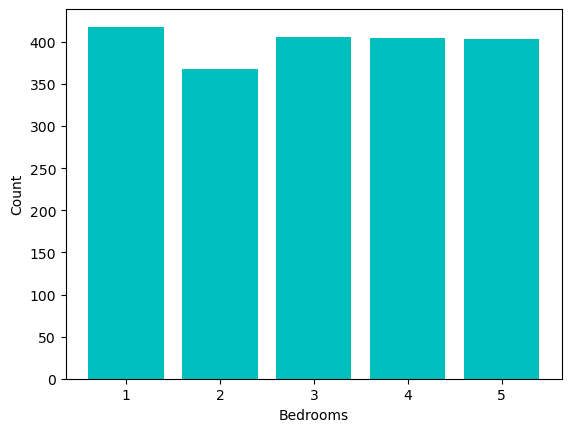

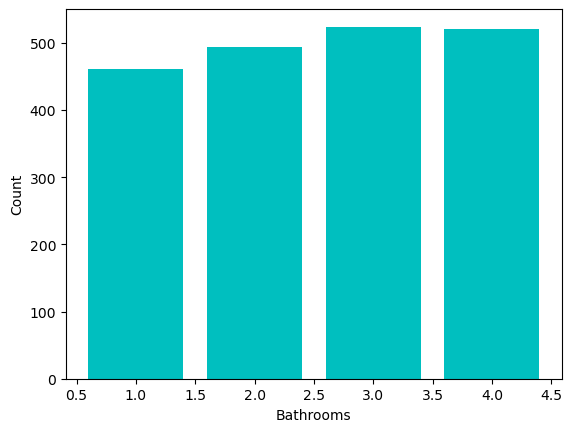

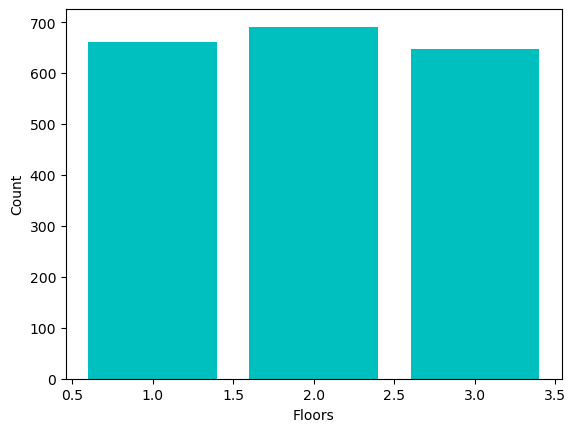

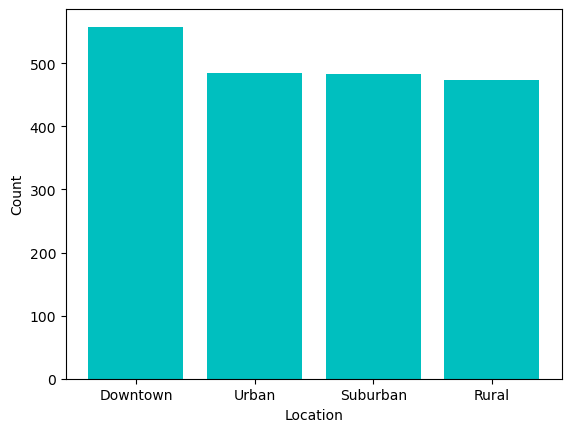

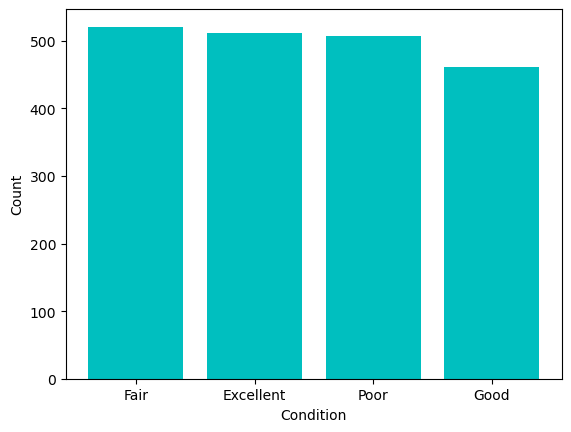

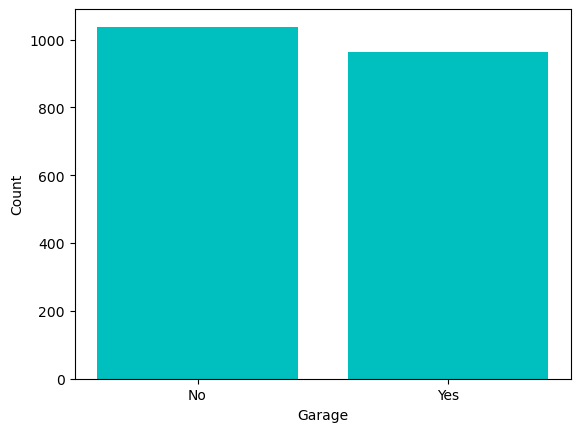

In [17]:

for i in cat:
    vc=df[i].value_counts()
    plt.bar(vc.index,height=vc,color='c')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()


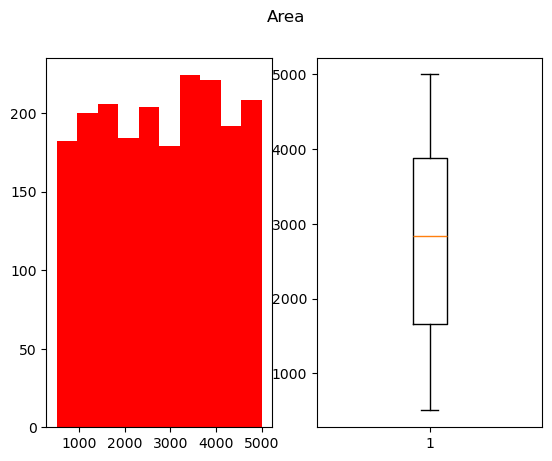

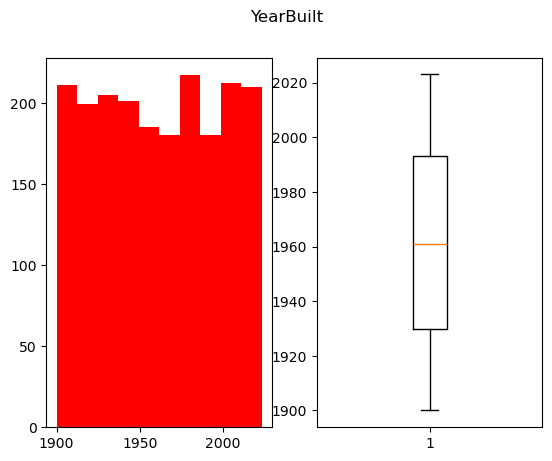

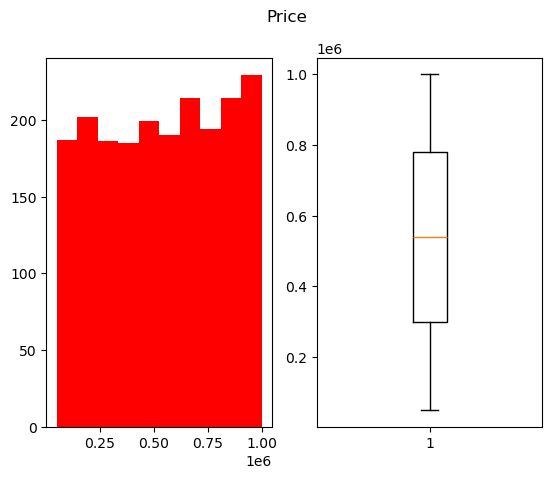

In [18]:
 for i in num:
    fig, ax=plt.subplots(1,2)
    ax[0].hist(df[i],color='r')
    ax[1].boxplot(df[i])
    plt.suptitle(i)
    plt.show()

## Cross Validation
#### It validates whether the training given to the model is valid or not it consists of training and testing
#### Basically it checks if the mmodel is trained on basis of testing and checks whether it gives correct output on various problems and if it doesnt give accurate answers then it means model is not trained properly 
## Overfitting:
#### When training is being done too much and no testing is done 
## Underfitting:
#### When the training done is also less because of which testing results is also low


In [20]:
print(df['Location'].nunique())
print(df['Location'].unique())

4
['Downtown' 'Suburban' 'Urban' 'Rural']


# One Heat Encoder
### It is used to categorize the data in 1 0 form

In [22]:
#use double square bracket for fit_transform since we need to provide a dataframe and not a column
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
locations=ohe.fit_transform(df[["Location"]])
locations

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [23]:
ohe.categories_

[array(['Downtown', 'Rural', 'Suburban', 'Urban'], dtype=object)]

In [24]:
type(locations)

numpy.ndarray

In [25]:
location_df = pd.DataFrame(locations,columns=ohe.categories_)
location_df=location_df.iloc[:,1:]
location_df


,Rural,Suburban,Urban
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1995,0.0,1.0,0.0
1996,0.0,1.0,0.0
1997,1.0,0.0,0.0
1998,0.0,0.0,1.0


In [26]:
df=pd.concat([df,location_df],axis=1)

In [27]:
df['Condition'].unique()


array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [28]:
df[['Condition']]=df[['Condition']].replace(to_replace=['Excellent', 'Good', 'Fair', 'Poor'],value=[3,2,1,0])

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_22496\1820664915.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Condition']]=df[['Condition']].replace(to_replace=['Excellent', 'Good', 'Fair', 'Poor'],value=[3,2,1,0])


In [29]:
df[['Garage']]=df[['Garage']].replace(to_replace=df['Garage'].unique(),value=(1,0))

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_22496\3095966332.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Garage']]=df[['Garage']].replace(to_replace=df['Garage'].unique(),value=(1,0))


In [30]:
df


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,3,1,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,3,1,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,2,1,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,1,0,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,1,0,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,0,1,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,0,0,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,0,1,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,3,0,161119,0.0,0.0,1.0


In [31]:
X_df= df.drop(['Location','Price'],axis=1)           # Independent data 
y= df['Price']           # Dependent data
X_df


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,3,1,0.0,0.0,0.0
1,4272,5,4,3,1958,3,1,0.0,0.0,0.0
2,3592,2,2,3,1938,2,1,0.0,0.0,0.0
3,966,4,2,2,1902,1,0,0.0,1.0,0.0
4,4926,1,4,2,1975,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0,1,0.0,1.0,0.0
1996,3046,5,2,1,2019,0,0,0.0,1.0,0.0
1997,1062,5,1,2,1903,0,1,1.0,0.0,0.0
1998,4062,3,1,2,1936,3,0,0.0,0.0,1.0


In [32]:
X=X_df.values


In [33]:
Y=y.values


In [48]:
X_df.columns

Index([       'Area',    'Bedrooms',   'Bathrooms',      'Floors',
         'YearBuilt',   'Condition',      'Garage',    ('Rural',),
       ('Suburban',),    ('Urban',)],
      dtype='object')

In [50]:
X_df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,3,1,0.0,0.0,0.0
1,4272,5,4,3,1958,3,1,0.0,0.0,0.0
2,3592,2,2,3,1938,2,1,0.0,0.0,0.0
3,966,4,2,2,1902,1,0,0.0,1.0,0.0
4,4926,1,4,2,1975,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0,1,0.0,1.0,0.0
1996,3046,5,2,1,2019,0,0,0.0,1.0,0.0
1997,1062,5,1,2,1903,0,1,1.0,0.0,0.0
1998,4062,3,1,2,1936,3,0,0.0,0.0,1.0


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
                                            

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 10)
(400, 10)
(1600,)
(400,)


In [56]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [58]:
y_train_pred=lr_model.predict(X_train)

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [62]:
mse_t=mean_squared_error(y_train_pred,y_train)
rmse_t=mse_t**0.5
mae_t=mean_absolute_error(y_train_pred,y_train)
print(mse_t)
print(rmse_t)
print(mae_t)

77493835068.88966
278377.1453781536
241404.41501856488


In [64]:
y_test_pred=lr_model.predict(X_test)

In [66]:
mse_test=mean_squared_error(y_test_pred,y_test)
rmse_test=mse_test**0.5
mae_test=mean_absolute_error(y_test_pred,y_test)
print(mse_test)
print(rmse_test)
print(mae_test)

69950148039.25958
264480.90297649015
226115.13920729904


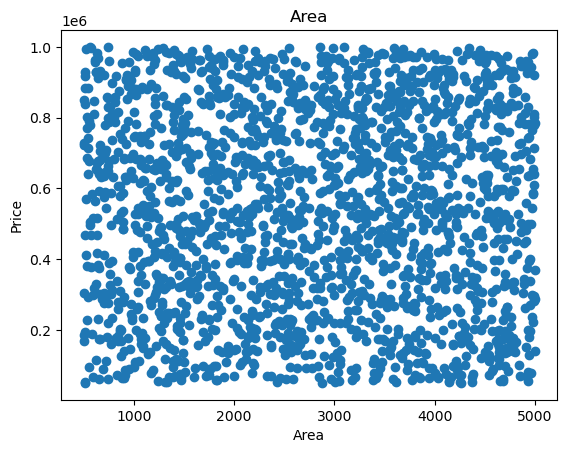

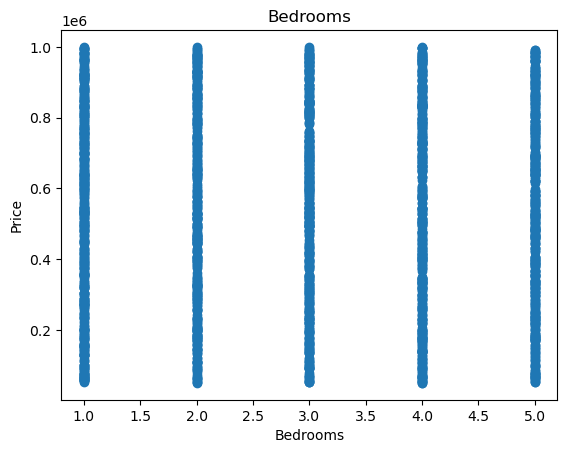

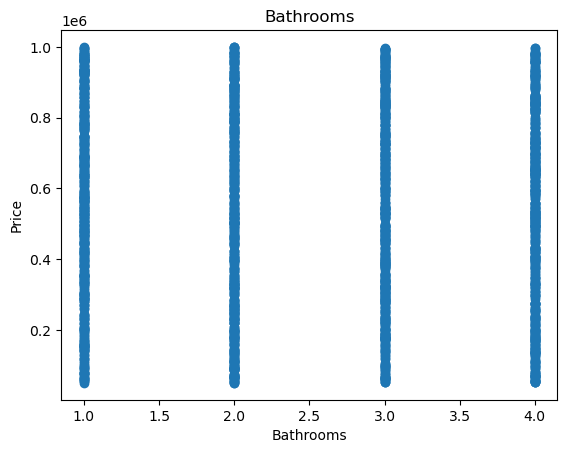

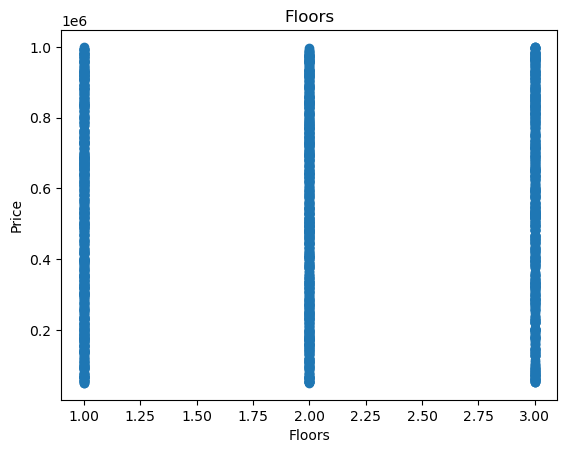

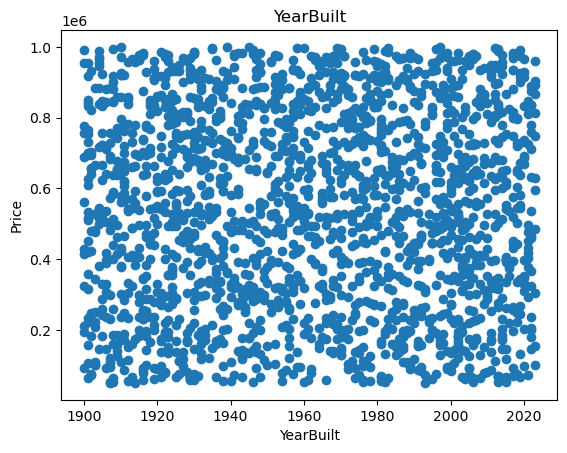

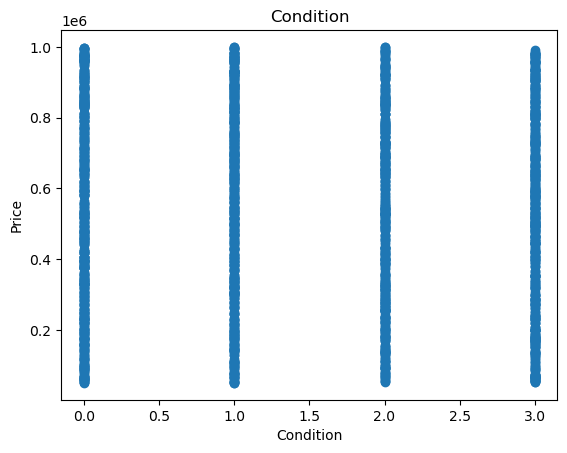

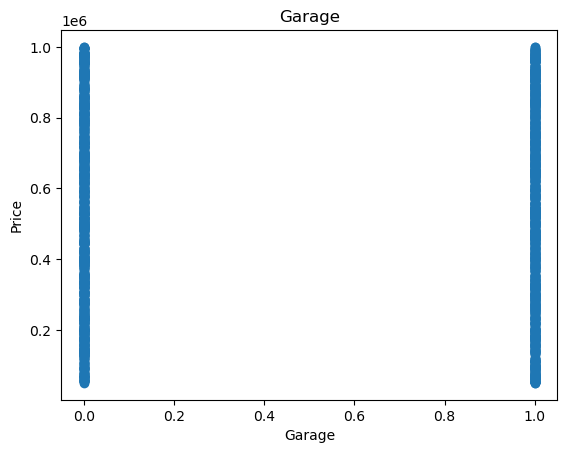

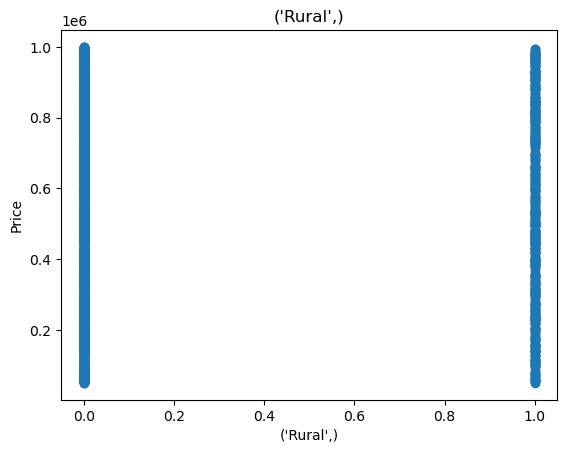

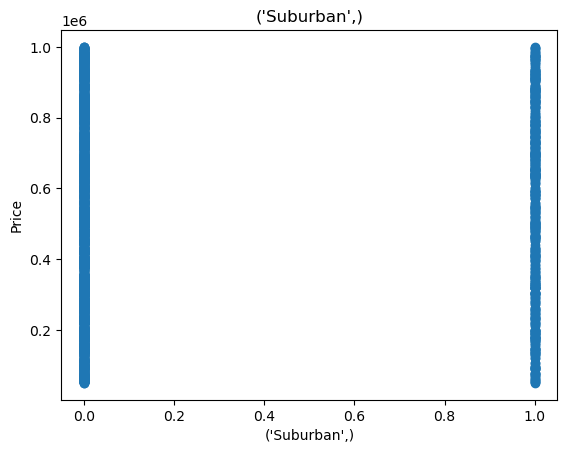

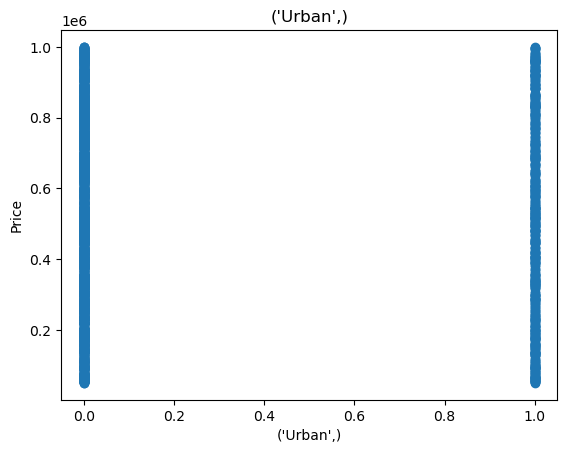

In [70]:
for i in X_df.columns:
    plt.scatter(X_df[i],y)
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title(i)
    plt.show()

In [76]:
#assumptions of linear regresion
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson as dw
from statsmodels.stats.diagnostic import het_breuschpagan as hb
from scipy.stats import shapiro, probplot


def test_linear_regression_assumptions(X, y, X_df):
    """Test the key assumptions of linear regression: Liniarity, Independence, Homoscedasticity, Normality of residuals and No Multicollinearity
    
    Parameters:
    x (Dataframe): Independent variables
    y (Series): Dependent variables
    
    Returns:
    None
    """
    
    #Add constant to x for intercept
    X=sm.add_constant(X)

    #fit OLS model
    ols_model =sm.OLS(y,X).fit()
    residuals =ols_model.resid
    predicted_values = ols_model.fittedvalues

    #Linearity
    print("1. Linearity:\n")
    plt.scatter(predicted_values, residuals, alpha=0.7, edgecolors='k')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted Values")
    plt.show()
    print("Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-Linearity")

    # No Autocorrelation: independence of Errors
    print("1. Independence of Errors(Durbin Watson Test):\n")
    dw_stat= dw(residuals)
    print(f"Durbin Watson Statistics:{dw_stat}")
    if 1.5 <= dw_stat >= 2.5:
        print("Residual appears to be independent(No autocorrelation).\n")
    else:
        ("Residuals show autocorrelation. consider adding lag variables or using GLS.\n")

    #Homoscedasticity
    print("3. Homoscedasticity(Breusch-Pegan Test):\n")
    bp_test = hb(residuals,X)
    print(f"Lagrange Multiplier Statistics: {bp_test[0]}")
    print(f"p-value: {bp_test}")
    if bp_test[1]>0.05:
        print("Residuals have constant variance(Homoscedasticity).\n")
    else:
        print("Residuals do not have constant variiance(heteroscedasticity). consider GLS or transfromation.\n")

    #Normality of Error
    print("4. Normality of Errors\n")
    sns.histplot(residuals, kde= True, bins=20, color='blue')
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

    probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.show()


    shapiro_test = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")
    if shapiro_test.pvalue > 0.05:
        print ("Residuals are normally distributed. \n")
    else:
        print ("Residuals are not normally distributed. Consider transformations or robust regression.\n")

    #Multicollinearity
    print("5. Multicollinearity (Variance Inflation Factor):\n")
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_df.columns
    vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    print (vif_data)
    if vif_data["VIF"].max() > 10:
        print("High multicollinearity detected. Consider removing or combining highly correlated variables. \n")
    else:
        print("No significant multicollinearity detected.\n")

1. Linearity:



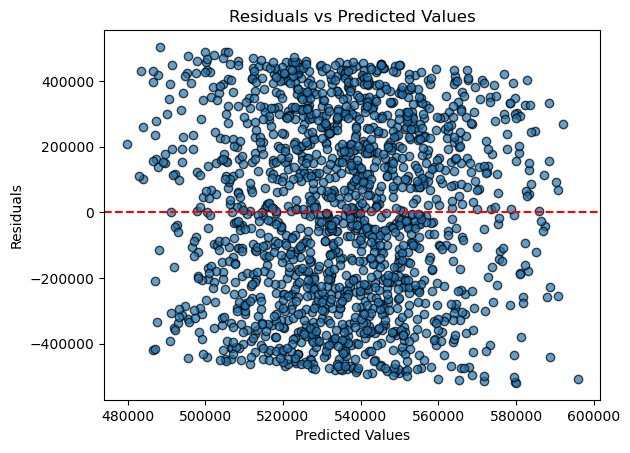

Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-Linearity
1. Independence of Errors(Durbin Watson Test):

Durbin Watson Statistics:2.0109193267110332
3. Homoscedasticity(Breusch-Pegan Test):

Lagrange Multiplier Statistics: 10.876761574348137
p-value: (10.876761574348137, 0.3671997473174348, 1.0875918068356705, 0.3680433345366866)
Residuals have constant variance(Homoscedasticity).

4. Normality of Errors



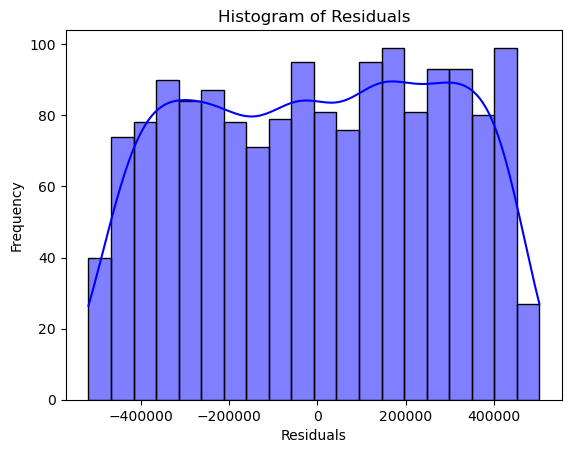

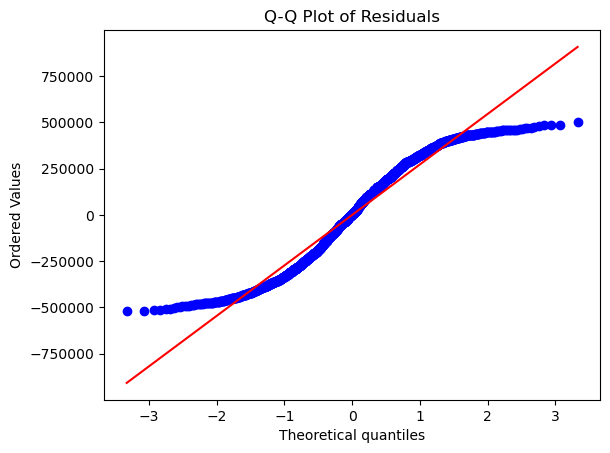

Shapiro-Wilk Test p-value: 8.37437936555083e-22
Residuals are not normally distributed. Consider transformations or robust regression.

5. Multicollinearity (Variance Inflation Factor):

       Feature        VIF
0         Area   5.637499
1     Bedrooms   5.462243
2    Bathrooms   6.303486
3       Floors   7.069040
4    YearBuilt  25.988084
5    Condition   2.753289
6       Garage   2.091085
7     (Rural,)   1.852293
8  (Suburban,)   1.866693
9     (Urban,)   1.868663
High multicollinearity detected. Consider removing or combining highly correlated variables. 



In [78]:
test_linear_regression_assumptions(X_train,y_train,X_df)

## Polynomial Regression

In [81]:
from sklearn.preprocessing import PolynomialFeatures


In [83]:
poly=PolynomialFeatures(degree=2)
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)

In [85]:
X_train[0]

array([1.216e+03, 3.000e+00, 2.000e+00, 1.000e+00, 1.947e+03, 0.000e+00,
       1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00])

In [87]:
X_poly_train[0]

array([1.000000e+00, 1.216000e+03, 3.000000e+00, 2.000000e+00,
       1.000000e+00, 1.947000e+03, 0.000000e+00, 1.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 1.478656e+06,
       3.648000e+03, 2.432000e+03, 1.216000e+03, 2.367552e+06,
       0.000000e+00, 1.216000e+03, 1.216000e+03, 0.000000e+00,
       0.000000e+00, 9.000000e+00, 6.000000e+00, 3.000000e+00,
       5.841000e+03, 0.000000e+00, 3.000000e+00, 3.000000e+00,
       0.000000e+00, 0.000000e+00, 4.000000e+00, 2.000000e+00,
       3.894000e+03, 0.000000e+00, 2.000000e+00, 2.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 1.947000e+03,
       0.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 3.790809e+06, 0.000000e+00, 1.947000e+03,
       1.947000e+03, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 0.0000

In [89]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_train)
y_poly_pred

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_poly_train = mean_squared_error(y_poly_pred, y_train)
rmse_poly_test = mean_squared_error(y_poly_pred , y_train) ** 0.5
mae_poly_train = mean_absolute_error(y_poly_pred, y_train)
r2_poly_train = r2_score(y_poly_pred, y_train)

print(mse_poly_train)
print(rmse_poly_test)
print(mae_poly_train)
print(r2_poly_train)

75312989993.3685
274432.1227432541
236584.88053340768
-27.443242320414164


In [90]:
y_poly_pred = poly_model.predict(X_poly_test)
y_poly_pred

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_poly_test = mean_squared_error(y_poly_pred, y_test)
rmse_poly_test = mean_squared_error(y_poly_pred , y_test) ** 0.5
mae_poly_test = mean_absolute_error(y_poly_pred, y_test)
r2_poly_test = r2_score(y_poly_pred, y_test)

print(mse_poly_test)
print(rmse_poly_test)
print(mae_poly_test)
print(r2_poly_test)


71079525773.32816
266607.43758066493
225985.53925548695
-26.189100979414352


In [93]:
#lasso
from sklearn.linear_model import Lasso,Ridge,ElasticNet

l1=Lasso(alpha=1.0)
l1.fit(X_train,y_train)
y_pred_train_l1=l1.predict(X_train)

mse_l1_train=mean_squared_error(y_pred_train_l1,y_train)
rmse_l1_train=mean_squared_error(y_pred_train_l1,y_train)**0.5
mae_l1_train=mean_absolute_error(y_train,y_pred_train_l1)
r2_l1_train=r2_score(y_train,y_pred_train_l1)
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

77493835091.66805
278377.1454190664
241404.44889964082
0.005990048391976699


In [95]:
#lasso

y_pred_test_l1=l1.predict(X_test)

mse_l1_test=mean_squared_error(y_pred_test_l1,y_test)
rmse_l1_test=mean_squared_error(y_pred_test_l1,y_test)**0.5
mae_l1_test=mean_absolute_error(y_test,y_pred_test_l1)
r2_l1_test=r2_score(y_test,y_pred_test_l1)
print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)


69950042978.86386
264480.7043601931
226114.7452810479
-0.0005031803638551047


In [97]:
# Lasso Regression it avoids overfitting and teaches extra features to the data because of regularisation.lasso regrssion uses l1 regularisation.
l2=Ridge(alpha=1.0)
l2.fit(X_train,y_train)
y_pred_train_l1=l2.predict(X_train)

mse_l1_train=mean_squared_error(y_pred_train_l1,y_train)
rmse_l1_train=mean_squared_error(y_pred_train_l1,y_train)**0.5
mae_l1_train=mean_absolute_error(y_pred_train_l1,y_train)
r2_l1_train=r2_score(y_train,y_pred_train_l1)
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)


77493836998.93173
278377.1488447493
241405.5710556811
0.0059900239275908485


In [99]:
# Lasso Regression
y_pred_test_l1=l2.predict(X_test)

mse_l1_test=mean_squared_error(y_pred_test_l1,y_test)
rmse_l1_test=mean_squared_error(y_pred_test_l1,y_test)**0.5
mae_l1_test=mean_absolute_error(y_pred_test_l1,y_test)
r2_l1_test=r2_score(y_test,y_pred_test_l1)
print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)


69949193750.94127
264479.09889241017
226112.94231707745
-0.0004910337632066941


In [101]:
# Elastic NEt
l2=ElasticNet(alpha=1.0,l1_ratio=0.6)
l2.fit(X_train,y_train)
y_pred_train_l1=l2.predict(X_train)

mse_l1_train=mean_squared_error(y_pred_train_l1,y_train)
rmse_l1_train=mean_squared_error(y_pred_train_l1,y_train)**0.5
mae_l1_train=mean_absolute_error(y_pred_train_l1,y_train)
r2_l1_train=r2_score(y_train,y_pred_train_l1)
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

77617289888.01068
278598.79735564307
241859.75173997658
0.0044064992490912


In [103]:
#Elastic Net
y_pred_test_l1=l2.predict(X_test)
mse_l1_test=mean_squared_error(y_pred_test_l1,y_test)
rmse_l1_test=mean_squared_error(y_pred_test_l1,y_test)**0.5
mae_l1_test=mean_absolute_error(y_pred_test_l1,y_test)
r2_l1_test=r2_score(y_test,y_pred_test_l1)
print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)


69893346794.70448
264373.4986618449
225746.82222341574
0.00030775141188510435


In [105]:
#knn regressor
from sklearn.neighbors import KNeighborsRegressor as knr
knn_r=knr(n_neighbors=5)
knn_r.fit(X_train,y_train)
y_train_knn=knn_r.predict(X_train)

mse_knn_train=mean_squared_error(y_train_knn,y_train)
rmse_knn_train=mean_squared_error(y_train_knn,y_train)**0.5
mae_knn_train=mean_absolute_error(y_train_knn,y_train)
r2_knn_train=r2_score(y_train,y_train_knn)
print(mse_knn_train)
print(rmse_knn_train)
print(mae_knn_train)
print(r2_knn_train)

62241443102.0991
249482.35028173655
208717.44225000002
0.2016317972552757


In [107]:
#knn regressor
y_test_knn=knn_r.predict(X_test)

mse_knn_test=mean_squared_error(y_test_knn,y_test)
rmse_knn_test=mean_squared_error(y_test_knn,y_test)**0.5
mae_knn_test=mean_absolute_error(y_test_knn,y_test)
r2_knn_test=r2_score(y_test,y_test_knn)
print(mse_knn_test)
print(rmse_knn_test)
print(mae_knn_test)
print(r2_knn_test)


86206882360.0464
293610.08558979444
249415.65
-0.23302654719655513


In [109]:
#svr
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
y_train_svr=svr.predict(X_train)

mse_svr_train=mean_squared_error(y_train_svr,y_train)
rmse_svr_train=mean_squared_error(y_train_svr,y_train)**0.5
mae_svr_train=mean_absolute_error(y_train_svr,y_train)
r2_svr_train=r2_score(y_train,y_train_svr)
print(mse_svr_train)
print(rmse_svr_train)
print(mae_svr_train)
print(r2_svr_train)

77976591027.24887
279242.8889466102
242440.25955425578
-0.00020224037005900364


In [115]:
#svr

y_test_svr=svr.predict(X_test)

mse_svr_test=mean_squared_error(y_test_svr,y_test)
rmse_svr_test=mean_squared_error(y_test_svr,y_test)**0.5
mae_svr_test=mean_absolute_error(y_test_svr,y_test)
r2_svr_test=r2_score(y_test,y_test_svr)
print(mse_svr_test)
print(rmse_svr_test)
print(mae_svr_test)
print(r2_svr_test)

69979456911.0278
264536.30546869704
225485.5319688107
-0.0009238910800146716


In [117]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor 
dtree=DecisionTreeRegressor(max_depth=20,random_state=0)
dtree.fit(X_train,y_train)
y_train_dtree=dtree.predict(X_train)

mse_dtree_train=mean_squared_error(y_train_dtree,y_train)
rmse_dtree_train=mean_squared_error(y_train_dtree,y_train)**0.5
mae_dtree_train=mean_absolute_error(y_train_dtree,y_train)
r2_dtree_train=r2_score(y_train,y_train_dtree)
print(mse_dtree_train)
print(rmse_dtree_train)
print(mae_dtree_train)
print(r2_dtree_train)


6111007094.266315
78172.93070025145
27914.950517346522
0.9216143857267808


In [119]:
#decision tree regressor

y_test_dtree=dtree.predict(X_test)

mse_dtree_test=mean_squared_error(y_test_dtree,y_test)
rmse_dtree_test=mean_squared_error(y_test_dtree,y_test)**0.5
mae_dtree_test=mean_absolute_error(y_test_dtree,y_test)
r2_dtree_test=r2_score(y_test,y_test_dtree)
print(mse_dtree_test)
print(rmse_dtree_test)
print(mae_dtree_test)
print(r2_dtree_test)


138911565304.30176
372708.4186120589
299868.80901730276
-0.9868674407858471


In [121]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(max_depth=20,n_estimators=100,random_state=0)
forest.fit(X_train,y_train)
y_train_forest=forest.predict(X_train)

mse_forest_train=mean_squared_error(y_train_forest,y_train)
rmse_forest_train=mean_squared_error(y_train_forest,y_train)**0.5
mae_forest_train=mean_absolute_error(y_train_forest,y_train)
r2_forest_train=r2_score(y_train,y_train_forest)
print(mse_forest_train)
print(rmse_forest_train)
print(mae_forest_train)
print(r2_forest_train)



12897968399.826906
113569.22294278016
96679.93187354221
0.834558337062709


In [123]:
#random forest regressor

y_test_forest=forest.predict(X_test)

mse_forest_test=mean_squared_error(y_test_forest,y_test)
rmse_forest_test=mean_squared_error(y_test_forest,y_test)**0.5
mae_forest_test=mean_absolute_error(y_test_forest,y_test)
r2_forest_test=r2_score(y_test,y_test_forest)
print(mse_forest_test)
print(rmse_forest_test)
print(mae_forest_test)
print(r2_forest_test)



73998206377.6379
272026.113411264
232100.75619248077
-0.05840450797747465
